In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

# Define temperature depending on time

In [31]:
temp_frame_1 = pd.read_excel("температура_22.11.2020_8.21.xlsx", sheet_name="Temp_22.11.2020_8.21")

In [233]:
temp_frame_1

,T1,T2,T3,T4,T5,T6,T7,T8,Data,Time
0,2.448,1.811,1.630,1.908,2.559,1.810,1.203,1.702,2020-11-22,08:21:16
1,2.448,1.811,1.630,1.908,2.597,1.810,1.203,1.702,2020-11-22,08:21:17
2,2.448,1.812,1.630,1.908,2.568,1.810,1.203,1.703,2020-11-22,08:21:18
3,2.448,1.811,1.630,1.908,2.616,1.810,1.203,1.703,2020-11-22,08:21:19
4,2.448,1.811,1.630,1.908,2.586,1.810,1.203,1.703,2020-11-22,08:21:20
...,...,...,...,...,...,...,...,...,...,...
13618,2.443,1.806,1.624,1.903,2.104,1.805,1.203,1.697,2020-11-22,12:28:06
13619,2.444,1.806,1.624,1.903,2.108,1.805,1.203,1.697,2020-11-22,12:28:07
13620,2.443,1.806,1.623,1.903,2.114,1.805,1.203,1.697,2020-11-22,12:28:09
13621,2.443,1.806,1.623,1.903,2.117,1.805,1.203,1.697,2020-11-22,12:28:10


In [33]:
temp_frame_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13623 entries, 0 to 13622
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   T1      13623 non-null  float64       
 1   T2      13623 non-null  float64       
 2   T3      13623 non-null  float64       
 3   T4      13623 non-null  float64       
 4   T5      13623 non-null  float64       
 5   T6      13623 non-null  float64       
 6   T7      13623 non-null  float64       
 7   T8      13623 non-null  float64       
 8   Data    13623 non-null  datetime64[ns]
 9   Time    13623 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 1.0+ MB


In [34]:
temp_frame_1.describe()

,T1,T2,T3,T4,T5,T6,T7,T8
count,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,1.362300e+04,13623.000000
mean,2.445501,1.808739,1.626684,1.905519,2.106470,1.807426,1.203000e+00,1.699593
std,0.002514,0.003405,0.003657,0.003108,0.251123,0.003195,2.220528e-16,0.003273
min,2.440000,1.804000,1.622000,1.902000,2.007000,1.803000,1.203000e+00,1.695000
25%,2.443000,1.806000,1.624000,1.903000,2.034000,1.805000,1.203000e+00,1.697000
50%,2.445000,1.808000,1.626000,1.905000,2.042000,1.807000,1.203000e+00,1.699000
75%,2.447000,1.811000,1.629000,1.907000,2.051000,1.809000,1.203000e+00,1.701000
max,2.455000,1.821000,1.639000,1.917000,3.489000,1.819000,1.203000e+00,1.712000


In [35]:
#Данные чистые, нулевых значений нет
temp_frame_1.isnull().values.any()

False

In [36]:
def get_sec(time_str):
    h, m, s = time_str.hour, time_str.minute, time_str.second
    return (int(h) * 3600 + int(m) * 60 + int(s)) - 30076

In [37]:
def get_min(time_str):
    h, m, s = time_str.hour, time_str.minute, time_str.second
    return ((int(h) * 3600 + int(m) * 60 + int(s))) // 60 - 501

In [38]:
time_1 = temp_frame_1["Time"][0]
print(type(time_1))
print(get_sec(time_1))

<class 'datetime.time'>
0


In [39]:
for i in range(len(temp_frame_1["Time"])):
    temp_frame_1["Time"][i] = get_min(temp_frame_1["Time"][i])

/home/tater/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
temp_frame_1

,T1,T2,T3,T4,T5,T6,T7,T8,Data,Time
0,2.448,1.811,1.630,1.908,2.559,1.810,1.203,1.702,2020-11-22,0
1,2.448,1.811,1.630,1.908,2.597,1.810,1.203,1.702,2020-11-22,0
2,2.448,1.812,1.630,1.908,2.568,1.810,1.203,1.703,2020-11-22,0
3,2.448,1.811,1.630,1.908,2.616,1.810,1.203,1.703,2020-11-22,0
4,2.448,1.811,1.630,1.908,2.586,1.810,1.203,1.703,2020-11-22,0
...,...,...,...,...,...,...,...,...,...,...
13618,2.443,1.806,1.624,1.903,2.104,1.805,1.203,1.697,2020-11-22,247
13619,2.444,1.806,1.624,1.903,2.108,1.805,1.203,1.697,2020-11-22,247
13620,2.443,1.806,1.623,1.903,2.114,1.805,1.203,1.697,2020-11-22,247
13621,2.443,1.806,1.623,1.903,2.117,1.805,1.203,1.697,2020-11-22,247


In [41]:
temp_frame.isnull().values.any()

False

In [42]:
def lineplot(x_data, y_data, x_label="", y_label="", title=""):
    # Create the plot object
    _, ax = plt.subplots()

    # Plot the best fit line, set the linewidth (lw), color and
    # transparency (alpha) of the line
    ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

In [43]:
x_data = temp_frame_1["Time"]
y_data = temp_frame_1.drop(["Time", "Data"], 1)

In [44]:
x_data

0          0
1          0
2          0
3          0
4          0
        ... 
13618    247
13619    247
13620    247
13621    247
13622    247
Name: Time, Length: 13623, dtype: object

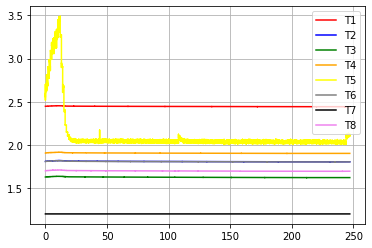

In [45]:
    plt.plot(x_data, y_data["T1"], color="red", label="T1")
    plt.plot(x_data, y_data["T2"], color="blue", label="T2")
    plt.plot(x_data, y_data["T3"], color="green", label="T3")
    plt.plot(x_data, y_data["T4"], color="orange", label="T4")
    plt.plot(x_data, y_data["T5"], color="yellow", label="T5")
    plt.plot(x_data, y_data["T6"], color="gray", label="T6")
    plt.plot(x_data, y_data["T7"], color="black", label="T7")
    plt.plot(x_data, y_data["T8"], color="violet", label="T8")
    plt.grid(True)
    plt.legend()

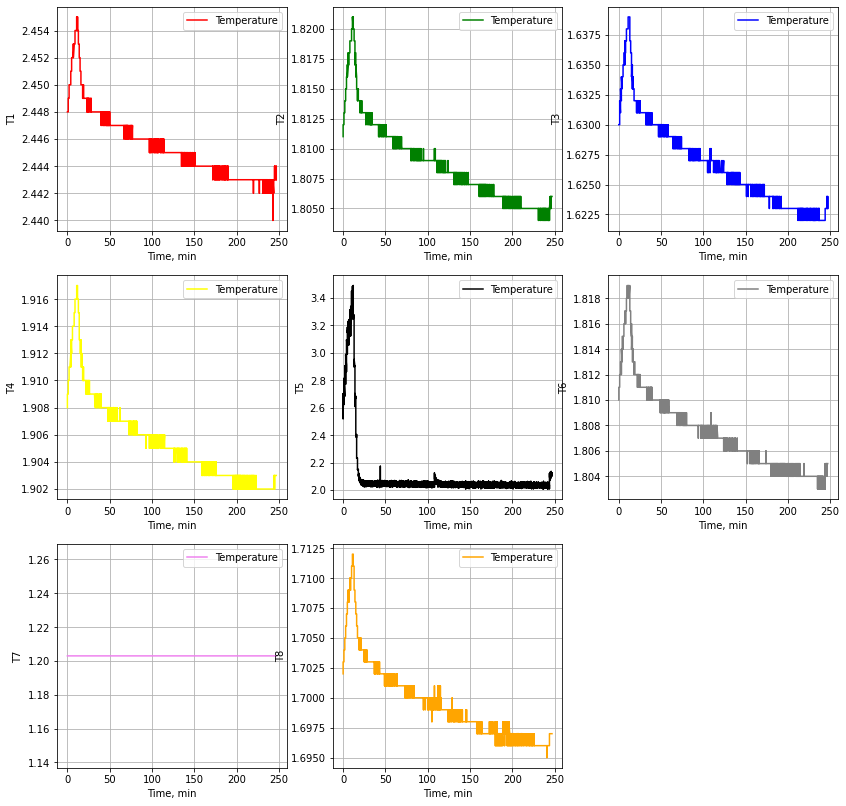

In [46]:
plt.figure(figsize=(14, 14))
colormap = ["red", "green", "blue", "yellow", "black", "gray", "violet", "orange"]
for i in range(1,9,1):
    ax = plt.subplot(3,3,i)
    plt.plot(x_data, y_data["T"+str(i)], color=colormap[i-1], label="Temperature")
    plt.xlabel("Time, min")
    plt.ylabel("T{}".format(i))
    plt.grid(True)
    plt.legend()

# Define temperature depending on time (all data)

In [197]:
temp_frame_2 = pd.read_excel("температура_22.11.2020_12.30.xlsx", sheet_name="Temp_22.11.2020_12.30")

In [198]:
temp_frame_2.head(200)

,T1,T2,T3,T4,T5,T6,T7,T8,Data,Time
0,2.443,1.806,1.624,1.903,2.093,1.805,1.203,1.697,2020-11-22,12:29:07
1,2.443,1.806,1.623,1.903,2.111,1.805,1.203,1.697,2020-11-22,12:29:08
2,2.443,1.806,1.624,1.903,2.108,1.805,1.203,1.697,2020-11-22,12:29:09
3,2.443,1.806,1.624,1.903,2.111,1.805,1.203,1.697,2020-11-22,12:29:10
4,2.444,1.806,1.624,1.903,2.098,1.805,1.203,1.697,2020-11-22,12:29:11
...,...,...,...,...,...,...,...,...,...,...
195,2.444,1.807,1.624,1.904,2.157,1.806,1.203,1.698,2020-11-22,12:32:39
196,2.444,1.807,1.625,1.904,2.162,1.805,1.203,1.698,2020-11-22,12:32:40
197,2.444,1.807,1.624,1.904,2.157,1.805,1.203,1.698,2020-11-22,12:32:41
198,2.444,1.807,1.624,1.904,2.158,1.805,1.203,1.698,2020-11-22,12:32:42


In [199]:
temp_frame_2_imp = temp_frame_2[:6000]

In [200]:
temp_frame_2_imp

,T1,T2,T3,T4,T5,T6,T7,T8,Data,Time
0,2.443,1.806,1.624,1.903,2.093,1.805,1.203,1.697,2020-11-22,12:29:07
1,2.443,1.806,1.623,1.903,2.111,1.805,1.203,1.697,2020-11-22,12:29:08
2,2.443,1.806,1.624,1.903,2.108,1.805,1.203,1.697,2020-11-22,12:29:09
3,2.443,1.806,1.624,1.903,2.111,1.805,1.203,1.697,2020-11-22,12:29:10
4,2.444,1.806,1.624,1.903,2.098,1.805,1.203,1.697,2020-11-22,12:29:11
...,...,...,...,...,...,...,...,...,...,...
5995,2.517,1.939,1.766,1.993,5.372,1.899,1.203,1.795,2020-11-22,14:17:47
5996,2.517,1.940,1.766,1.993,5.381,1.899,1.203,1.794,2020-11-22,14:17:48
5997,2.517,1.939,1.766,1.993,5.338,1.899,1.203,1.795,2020-11-22,14:17:49
5998,2.517,1.940,1.766,1.993,5.323,1.900,1.203,1.795,2020-11-22,14:17:50


In [201]:
temp_frame_1 = pd.read_excel("температура_22.11.2020_8.21.xlsx", sheet_name="Temp_22.11.2020_8.21")

In [202]:
temp_frame = pd.concat([temp_frame_1, temp_frame_2_imp], ignore_index=True)

In [203]:
temp_frame

,T1,T2,T3,T4,T5,T6,T7,T8,Data,Time
0,2.448,1.811,1.630,1.908,2.559,1.810,1.203,1.702,2020-11-22,08:21:16
1,2.448,1.811,1.630,1.908,2.597,1.810,1.203,1.702,2020-11-22,08:21:17
2,2.448,1.812,1.630,1.908,2.568,1.810,1.203,1.703,2020-11-22,08:21:18
3,2.448,1.811,1.630,1.908,2.616,1.810,1.203,1.703,2020-11-22,08:21:19
4,2.448,1.811,1.630,1.908,2.586,1.810,1.203,1.703,2020-11-22,08:21:20
...,...,...,...,...,...,...,...,...,...,...
19618,2.517,1.939,1.766,1.993,5.372,1.899,1.203,1.795,2020-11-22,14:17:47
19619,2.517,1.940,1.766,1.993,5.381,1.899,1.203,1.794,2020-11-22,14:17:48
19620,2.517,1.939,1.766,1.993,5.338,1.899,1.203,1.795,2020-11-22,14:17:49
19621,2.517,1.940,1.766,1.993,5.323,1.900,1.203,1.795,2020-11-22,14:17:50


In [204]:
temp_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19623 entries, 0 to 19622
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   T1      19623 non-null  float64       
 1   T2      19623 non-null  float64       
 2   T3      19623 non-null  float64       
 3   T4      19623 non-null  float64       
 4   T5      19623 non-null  float64       
 5   T6      19623 non-null  float64       
 6   T7      19623 non-null  float64       
 7   T8      19623 non-null  float64       
 8   Data    19623 non-null  datetime64[ns]
 9   Time    19623 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 1.5+ MB


In [205]:
temp_frame.describe()

,T1,T2,T3,T4,T5,T6,T7,T8
count,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,19623.000000,1.962300e+04,19623.000000
mean,2.465212,1.853040,1.672337,1.929522,3.389996,1.832605,1.203000e+00,1.725871
std,0.035098,0.114335,0.130589,0.042727,3.847934,0.044803,2.220503e-16,0.046750
min,2.440000,1.804000,1.622000,1.902000,2.007000,1.803000,1.203000e+00,1.695000
25%,2.444000,1.807000,1.625000,1.904000,2.037000,1.806000,1.203000e+00,1.698000
50%,2.446000,1.809000,1.627000,1.906000,2.049000,1.808000,1.203000e+00,1.700000
75%,2.454000,1.820000,1.638000,1.916000,3.328500,1.818000,1.203000e+00,1.711000
max,2.541000,2.906000,3.826000,2.021000,33.681000,1.929000,1.203000e+00,1.827000


In [206]:
#Данные чистые, нулевых значений нет
temp_frame.isnull().values.any()

False

In [207]:
for i in range(len(temp_frame["Time"])):
    temp_frame["Time"][i] = get_min(temp_frame["Time"][i])

/home/tater/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [208]:
temp_frame

,T1,T2,T3,T4,T5,T6,T7,T8,Data,Time
0,2.448,1.811,1.630,1.908,2.559,1.810,1.203,1.702,2020-11-22,0
1,2.448,1.811,1.630,1.908,2.597,1.810,1.203,1.702,2020-11-22,0
2,2.448,1.812,1.630,1.908,2.568,1.810,1.203,1.703,2020-11-22,0
3,2.448,1.811,1.630,1.908,2.616,1.810,1.203,1.703,2020-11-22,0
4,2.448,1.811,1.630,1.908,2.586,1.810,1.203,1.703,2020-11-22,0
...,...,...,...,...,...,...,...,...,...,...
19618,2.517,1.939,1.766,1.993,5.372,1.899,1.203,1.795,2020-11-22,356
19619,2.517,1.940,1.766,1.993,5.381,1.899,1.203,1.794,2020-11-22,356
19620,2.517,1.939,1.766,1.993,5.338,1.899,1.203,1.795,2020-11-22,356
19621,2.517,1.940,1.766,1.993,5.323,1.900,1.203,1.795,2020-11-22,356


In [209]:
x_data = temp_frame["Time"]
y_data = temp_frame.drop(["Time", "Data"], 1)

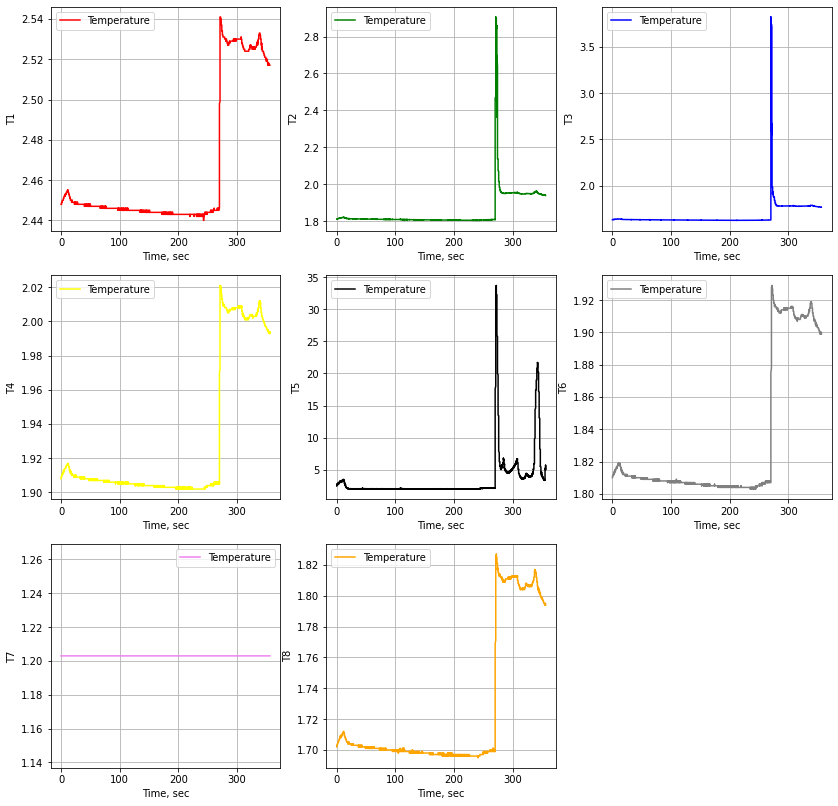

In [210]:
plt.figure(figsize=(14, 14))
colormap = ["red", "green", "blue", "yellow", "black", "gray", "violet", "orange"]
for i in range(1,9,1):
    ax = plt.subplot(3,3,i)
    plt.plot(x_data, y_data["T"+str(i)], color=colormap[i-1], label="Temperature")
    plt.xlabel("Time, sec")
    plt.ylabel("T{}".format(i))
    plt.grid(True)
    plt.legend()

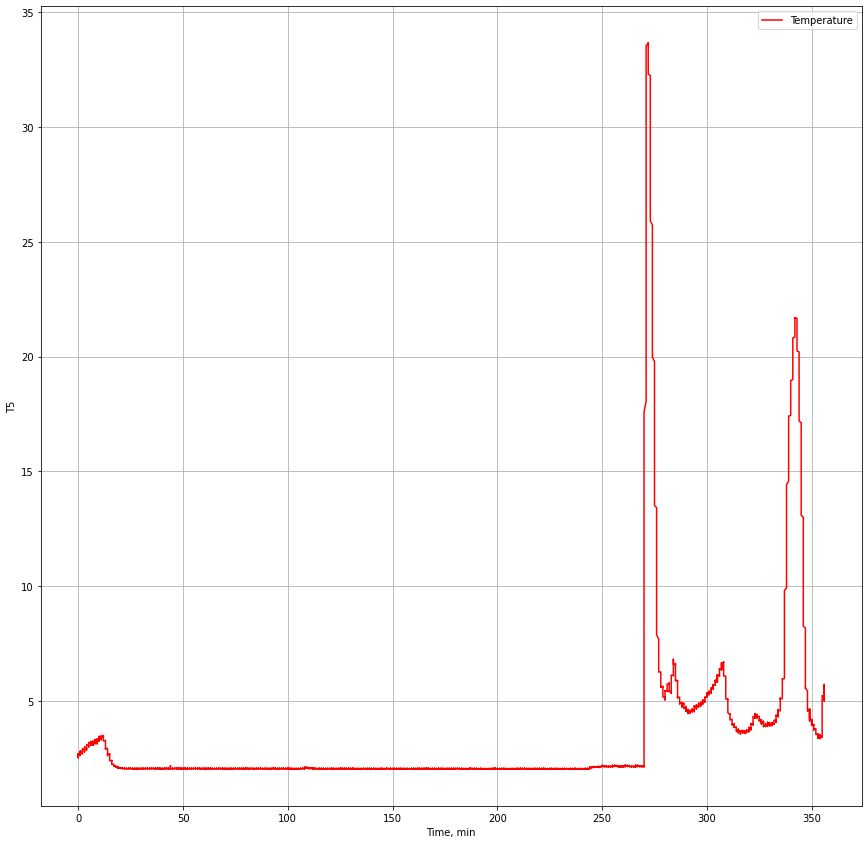

In [211]:
plt.figure(figsize=(50, 50))
ax = plt.subplot(3,3,1)
plt.plot(x_data, y_data["T5"], color="red", label="Temperature")
plt.xlabel("Time, min")
plt.ylabel("T{}".format(5))
plt.grid(True)
plt.legend()

# Define volume depending on time ()

In [212]:
volume_frame_1 = pd.read_excel("уровень_22.11.2020_8.21.xlsx", sheet_name="Lev_22.11.2020_8.21")

In [213]:
volume_frame_1

,Volume,Date,Time
0,65.3,2020-11-22,08:21:33
1,65.3,2020-11-22,08:21:34
2,65.3,2020-11-22,08:21:35
3,65.3,2020-11-22,08:21:36
4,65.4,2020-11-22,08:21:37
...,...,...,...
715,65.2,2020-11-22,08:33:28
716,65.3,2020-11-22,08:33:29
717,65.3,2020-11-22,08:33:30
718,65.3,2020-11-22,08:33:31


In [214]:
volume_frame_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Volume  720 non-null    float64       
 1   Date    720 non-null    datetime64[ns]
 2   Time    720 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 17.0+ KB


In [215]:
for i in range(len(volume_frame_1["Time"])):
    volume_frame_1["Time"][i] = get_min(volume_frame_1["Time"][i])

/home/tater/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [216]:
volume_frame_1

,Volume,Date,Time
0,65.3,2020-11-22,0
1,65.3,2020-11-22,0
2,65.3,2020-11-22,0
3,65.3,2020-11-22,0
4,65.4,2020-11-22,0
...,...,...,...
715,65.2,2020-11-22,12
716,65.3,2020-11-22,12
717,65.3,2020-11-22,12
718,65.3,2020-11-22,12


In [217]:
x_data_v = volume_frame_1["Time"]
y_data_v = volume_frame_1["Volume"]
y_data

,T1,T2,T3,T4,T5,T6,T7,T8
0,2.448,1.811,1.630,1.908,2.559,1.810,1.203,1.702
1,2.448,1.811,1.630,1.908,2.597,1.810,1.203,1.702
2,2.448,1.812,1.630,1.908,2.568,1.810,1.203,1.703
3,2.448,1.811,1.630,1.908,2.616,1.810,1.203,1.703
4,2.448,1.811,1.630,1.908,2.586,1.810,1.203,1.703
...,...,...,...,...,...,...,...,...
19618,2.517,1.939,1.766,1.993,5.372,1.899,1.203,1.795
19619,2.517,1.940,1.766,1.993,5.381,1.899,1.203,1.794
19620,2.517,1.939,1.766,1.993,5.338,1.899,1.203,1.795
19621,2.517,1.940,1.766,1.993,5.323,1.900,1.203,1.795


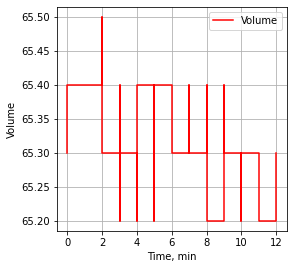

In [218]:
plt.figure(figsize=(14, 14))
colormap = ["red"]
ax = plt.subplot(3,3, 2)
plt.plot(x_data_v, y_data_v, color=colormap[0], label="Volume")
plt.xlabel("Time, min")
plt.ylabel("Volume")
plt.grid(True)
plt.legend()

In [219]:
volume_frame_1 = pd.read_excel("уровень_22.11.2020_8.21.xlsx", sheet_name="Lev_22.11.2020_8.21")
volume_frame_1

,Volume,Date,Time
0,65.3,2020-11-22,08:21:33
1,65.3,2020-11-22,08:21:34
2,65.3,2020-11-22,08:21:35
3,65.3,2020-11-22,08:21:36
4,65.4,2020-11-22,08:21:37
...,...,...,...
715,65.2,2020-11-22,08:33:28
716,65.3,2020-11-22,08:33:29
717,65.3,2020-11-22,08:33:30
718,65.3,2020-11-22,08:33:31


In [220]:
volume_frame_2 = pd.read_excel("уровень_22.11.2020_12.30.xlsx", sheet_name="Lev_22.11.2020_12.30")
volume_frame_2

,Volume,Date,Time
0,63.1,2020-11-22,12:29:18
1,63.1,2020-11-22,12:29:19
2,63.1,2020-11-22,12:29:20
3,63.1,2020-11-22,12:29:21
4,63.1,2020-11-22,12:29:22
...,...,...,...
7045,61.7,2020-11-22,14:26:45
7046,61.7,2020-11-22,14:26:46
7047,61.7,2020-11-22,14:26:47
7048,61.7,2020-11-22,14:26:48


In [221]:
volume_frame = pd.concat([volume_frame_1, volume_frame_2], ignore_index=True)

In [222]:
volume_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7770 entries, 0 to 7769
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Volume  7770 non-null   float64       
 1   Date    7770 non-null   datetime64[ns]
 2   Time    7770 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 182.2+ KB


In [223]:
volume_frame

,Volume,Date,Time
0,65.3,2020-11-22,08:21:33
1,65.3,2020-11-22,08:21:34
2,65.3,2020-11-22,08:21:35
3,65.3,2020-11-22,08:21:36
4,65.4,2020-11-22,08:21:37
...,...,...,...
7765,61.7,2020-11-22,14:26:45
7766,61.7,2020-11-22,14:26:46
7767,61.7,2020-11-22,14:26:47
7768,61.7,2020-11-22,14:26:48


In [224]:
for i in range(len(volume_frame["Time"])):
    volume_frame["Time"][i] = get_min(volume_frame["Time"][i])

/home/tater/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [225]:
x_data_v = volume_frame["Time"]
y_data_v = volume_frame["Volume"]

In [226]:
volume_frame

,Volume,Date,Time
0,65.3,2020-11-22,0
1,65.3,2020-11-22,0
2,65.3,2020-11-22,0
3,65.3,2020-11-22,0
4,65.4,2020-11-22,0
...,...,...,...
7765,61.7,2020-11-22,365
7766,61.7,2020-11-22,365
7767,61.7,2020-11-22,365
7768,61.7,2020-11-22,365


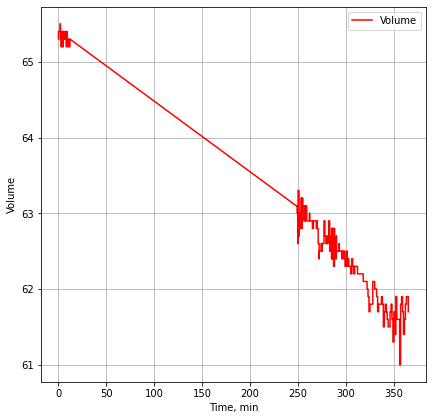

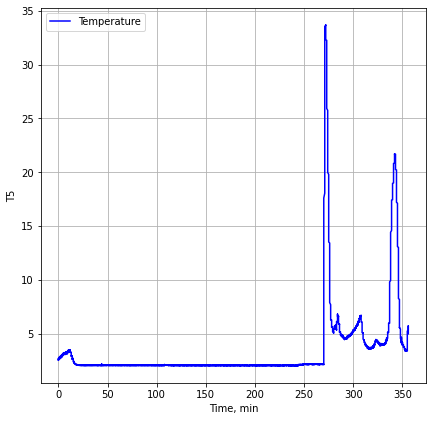

In [230]:
plt.figure(figsize=(40, 40))
colormap = ["red"]
ax = plt.subplot(5,5,1)
plt.plot(x_data_v, y_data_v, color=colormap[0], label="Volume")
plt.xlabel("Time, min")
plt.ylabel("Volume")
plt.grid(True)
plt.legend()

plt.figure(figsize=(40, 40))
ax = plt.subplot(5,5,1)
plt.plot(x_data, y_data["T5"], color="blue", label="Temperature")
plt.xlabel("Time, min")
plt.ylabel("T{}".format(5))
plt.grid(True)
plt.legend()